# Lending Club Case Study Notebook

## Introduction
### Goal
How data can be used minimize the risk of losing money while lending to customers.
### Context of Problem
This company is the largest **online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures**. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending loans to **‘risky’** applicants is the largest source of financial loss (called credit loss). **Credit loss** is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.
### Target
Reduce the Credit Loss by using EDA techniques to find driving factors for the defaulting of loan.
### Risk associated with the problem
 - If the applicant is likely to repay the loan, then not approving loan is a loss of business (rejecting loans for non - default).
 - If the applicant is not likely to repay the loan, then approving loan may lead to financial loss (approving loans for default).
The given dataset contains information about past loans and each row represents the loan details of the applicants.

In [ ]:
# Steps of analysis:
# 1. Data Understanding
# 2. Data Wrangling
# 3. Data Visualization and Analysis
# 4. Conclusion

### Loading Libraries and Data

In [1]:
#importing Libraries for data manipulation
import pandas as pd #dataframe
import numpy as np #numerical python
#importing Libraries for data visualization
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting
# Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')

In [3]:
#Loading the data and data dictionary via pandas's read methods for excel and csv
loan_data = pd.read_csv('loan.csv')
loan_dd = pd.read_excel('Data_Dictionary.xlsx')

### Setting Dataframe display options

In [4]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

### Printing the first 5 rows of the dataframe and data dictionary

In [5]:
# Printing the data dictionary(first 5 rows)
loan_dd.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [6]:
# Printing the data(first 5 rows)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0  1077501    1296599       5000         5000           4975.0   36 months   10.65%       162.87   
1  1077430    1314167       2500         2500           2500.0   60 months   15.27%        59.83   
2  1077175    1313524       2400         2400           2400.0   36 months   15.96%        84.33   
3  1076863    1277178      10000        10000          10000.0   36 months   13.49%       339.31   
4  1075358    1311748       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length home_ownership  annual_inc  \
0     B        B2                       NaN  10+ years           RENT     24000.0   
1     C        C4                     Ryder   < 1 year           RENT     30000.0   
2     C        C5                       NaN  10+ years           RENT     12252.0   
3     C        C1       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4     B        B5  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   
3  https://lendingclub.com/browse/loanDetail.acti...   
4  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose                 title  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card              Computer   
1    Borrower added on 12/22/11 > I plan to use t...             car                  bike   
2                                                NaN  small_business  real estate business   
3    Borrower added on 12/21/11 > to pay for prop...           other              personel   
4    Borrower added on 12/21/11 > I plan on combi...           other              Personal   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
0                     NaN                     NaN         3        0      13648     83.70%   
1                     NaN                     NaN         3        0       1687      9.40%   
2                     NaN                     NaN         2        0       2956     98.50%   
3                    35.0                     NaN        10        0       5598        21%   
4                    38.0                     NaN        15        0      27783     53.90%   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0          9                   f       0.00           0.00   5863.155187          5833.84   
1          4                   f       0.00           0.00   1008.710000          1008.71   
2         10                   f       0.00           0.00   3005.666844          3005.67   
3         37                   f       0.00           0.00  12231.890000         12231.89   
4         38                   f     524.06         524.06   3513.330000          3513.33   

   total_rec_prncp  total_rec_int  total_rec_late_fee  rec

### Basic information about the data

In [7]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',loan_data.shape[1])
print('Number of Rows:',loan_data.shape[0])
## Number of missing values
print('Number of missing values:',loan_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',loan_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',loan_data.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


In [8]:
# Basic infomation about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [9]:
# Data types of each column
print(loan_data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [10]:
# Describing the dataframe
print(loan_data.describe())

                 id     member_id     loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000     39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196     10397.448868    324.561922   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670      7128.450439    208.874874   
min    5.473400e+04  7.069900e+04    500.000000    500.000000         0.000000     15.690000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000      5000.000000    167.020000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000      8975.000000    280.220000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000     14400.000000    430.780000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  3.971700e+04  39717.000000  39717.000

In [11]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit'],
      dtype='object', length=111)


### Cleaning the large null value columns and rows

In [12]:
## Checking for missing values
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [13]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [14]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
loan_data = loan_data.loc[:,loan_data.isnull().sum()/loan_data.shape[0]*100<50]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 54)


In [15]:
# Checking columns again for null value percentage
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

We have removed the column which contain more than 50% missing values which will reduce impact on analyis and imporve the accuracy of the analysis.

In [16]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [17]:
# Checking for missing values across the rows
print((loan_data.isnull().sum(axis=1)).max())

6


As the max number of missing value in row is very low compared to the count of columns(54 after removing irrelevant columns), we can move ahead with process as the impact is insignificant.

### Removing the irrelevant columns

In [18]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
loan_data=loan_data.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
loan_data=loan_data.drop(['zip_code'],axis=1)
# Removing member_id as it is a duplicate index column and is not required for the analysis
loan_data=loan_data.drop(['member_id'],axis=1)
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
loan_data=loan_data.drop(['funded_amnt_inv'],axis=1)
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 26)


Removed the above columns as they are customer behavior variables and are not available at time of decision and hence not useful for analysis.

In [19]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(loan_data.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


As there are many columns with 1 unique value and null values, we have removed them as they are not relevant to the analysis.

In [20]:
# Removing irrelevant columns which contain 1 unique value
loan_data = loan_data.loc[:,loan_data.nunique()>1]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 18)


In [21]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


As we are done removing the irrelevant columns, we can move ahead with the analysis and check for null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

### Removing and fixing the null values

In [22]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


| **Column name** | **Count of Null values** |
|---|---|
|  emp_length | 1075  |
|  pub_rec_bankruptcies | 697  |

The above columns has null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

In [23]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_data.emp_length.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [24]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_data.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


As for column 'emp_length', we can remove the null values as fixing null values are not feasible and will lead to loss of information.

In [25]:
# Removing null values in emp_title and emp_length columns
loan_data = loan_data.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan_data.shape)

(38642, 18)


As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [26]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [27]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


We are done with fixing and removing null values to improve the accuracy of the analysis.

In [28]:
# Shape of the dataframe
print(loan_data.shape)

(38642, 18)


### Removing duplicate rows from the dataframe

In [29]:
# Removing duplicate rows in the dataframe
loan_data = loan_data.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan_data.shape)

# No duplicate rows found in the dataframe

(38642, 18)


### Correcting Data Types and Deriving New Columns

In [30]:
# Checking information about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [31]:
# Correcting data type and format for columns in the dataframe
## Derving more columns with the conversion of data type
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.emp_length=loan_data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month
# loan_data.loan_status=loan_data.loan_status.apply(lambda x: x.replace('Fully Paid','0').replace('Charged Off','1').replace('Current','2')).astype('int')
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [32]:
# Setting decimal point limit for all data
for x in loan_data.columns:
    if(loan_data[x].dtype=='float64'):
      loan_data[x]=loan_data[x].round(2)

loan_data.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0  1077501       5000         5000    36     10.65       162.87     B        B2        10.0   
1  1077430       2500         2500    60     15.27        59.83     C        C4         0.5   
2  1077175       2400         2400    36     15.96        84.33     C        C5        10.0   
3  1076863      10000        10000    36     13.49       339.31     C        C1        10.0   
4  1075358       3000         3000    60     12.69        67.79     B        B5         1.0   

  home_ownership  annual_inc verification_status    issue_d  loan_status         purpose  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid     credit_card   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off             car   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid  small_business   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid           other   
4           RENT     80000.0     Source Verified 2011-12-01      Current           other   

  addr_state    dti  pub_rec_bankruptcies  issue_year  issue_month  
0         AZ  27.65                   0.0        2011           12  
1         GA   1.00                   0.0        2011           12  
2         IL   8.72                   0.0        2011           12  
3         CA  20.00                   0.0        2011           12  
4         OR  17.94                   0.0        2011           12

As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [33]:
# Removing loans with status as 'Current'
loan_data = loan_data[loan_data.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan_data.shape)

(37544, 20)


As the data has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis.

In [34]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_data = loan_data[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan_data.shape

(37544, 17)

In [35]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

### Removing the outliers

In [36]:
# Checking outlier values in continuous columns via box plot
## The continuous columns are loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies
## We will check outlier using box plot and then remove the outliers as per requirement

In [37]:
## starting with loan_amnt
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()
## Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.

In [38]:
## starting with int_rate
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='int_rate',width=750,height=350,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()
## Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

In [39]:
## starting with annual_inc
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Burrower',labels={'annual_inc':'Annual Income'}).show()
## Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.

In [40]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [41]:
## Removing outliers in annual_inc greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

In [42]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

As the trend is more compatible with the analysis, we can proceed with analysis of column 'dti'.

In [43]:
## starting with dti
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='dti',width=750,height=350,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()
## There are no outliers in dti hence we can move ahead with analysis.

The data has been cleaned and outliers removed, we can move ahead with the analysis.

### Univariate Analysis

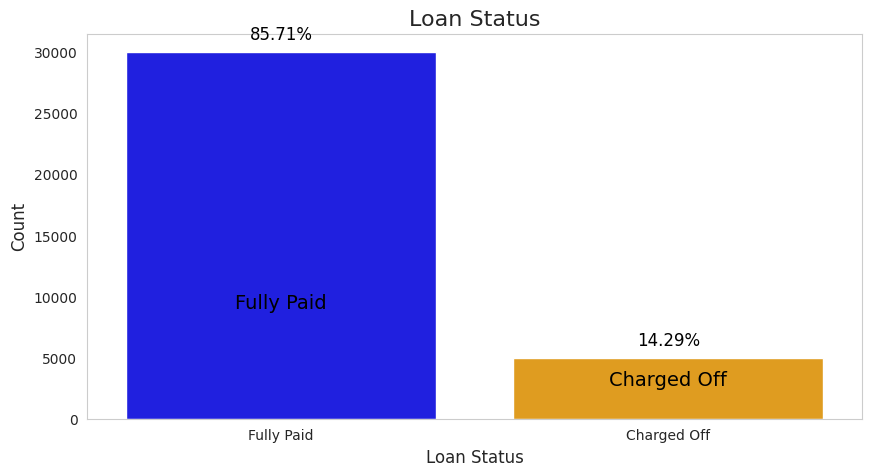

In [51]:


# Example data
loan_status = ['Fully Paid', 'Charged Off']
counts = [30000, 5000]

# Create the bar plot with custom colors for each bar
plt.figure(figsize=(10, 5))

# Define custom colors for each bar
colors = ['blue', 'orange']

# Plotting bars with different colors
ax = sns.barplot(x=loan_status, y=counts, palette=colors)

# Add annotations to the bars
for i, count in enumerate(counts):
    percentage = (count * 100) / sum(counts)  # Calculate percentage
    ax.text(i, count + 1000, f'{percentage:.2f}%', ha='center', fontsize=12, color='black')

# Add custom annotations for the loan status labels
ax.annotate('Fully Paid', xy=(0.25, 0.3), xycoords='axes fraction', horizontalalignment='center', verticalalignment='center', fontsize=14, color='black')
ax.annotate('Charged Off', xy=(0.75, 0.1), xycoords='axes fraction', horizontalalignment='center', verticalalignment='center', fontsize=14, color='black')

# Customize the title and labels
ax.set_title('Loan Status', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Display the plot
plt.show()


**Inference:** Defaulted loan are low in numbers compared to Fully Paid.

In [45]:
# Loan Amount
print(loan_data.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


**Inference**: The loan amount varies from 500 to 35000 with a mean of 9800.

term
36    75.37729
60    24.62271
Name: count, dtype: float64


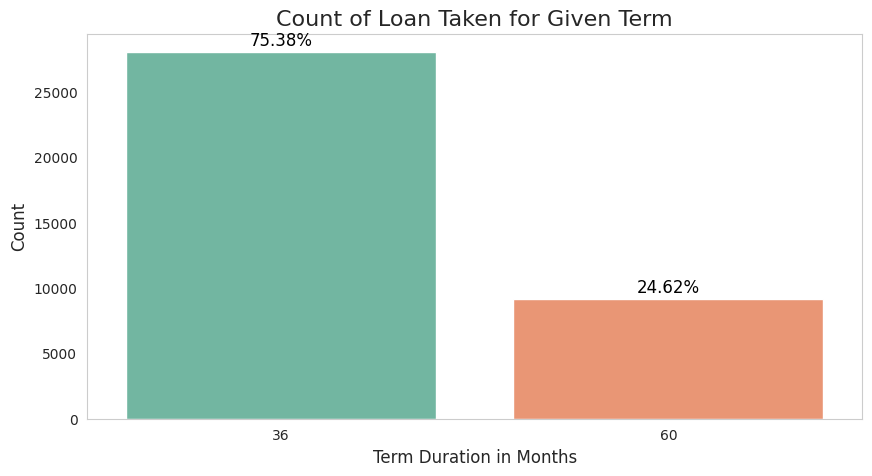

In [52]:
# Calculate and print the percentage of loans for each term
print(loan_data.term.value_counts() * 100 / loan_data.term.count())

# Create a colorful bar chart
plt.figure(figsize=(10, 5))

# Define a custom color palette
palette = sns.color_palette("Set2", n_colors=len(loan_data.term.value_counts()))

# Create the count plot
ax = sns.countplot(x=loan_data.term, palette=palette)

# Add percentage annotations on top of the bars
total_loans = loan_data.term.count()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_loans) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 500, f'{percentage:.2f}%', ha='center', fontsize=12, color='black')

# Set plot title and labels
ax.set_title('Count of Loan Taken for Given Term', fontsize=16)
ax.set_xlabel('Term Duration in Months', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Display the plot
plt.show()


**Inference**: More than half of the loan taken has term of 36 months compared to 60 months.

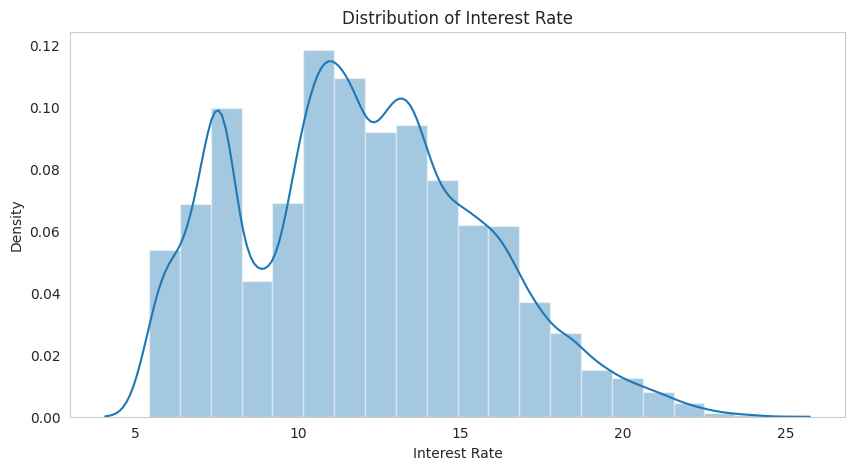

In [53]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

**Inference**: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

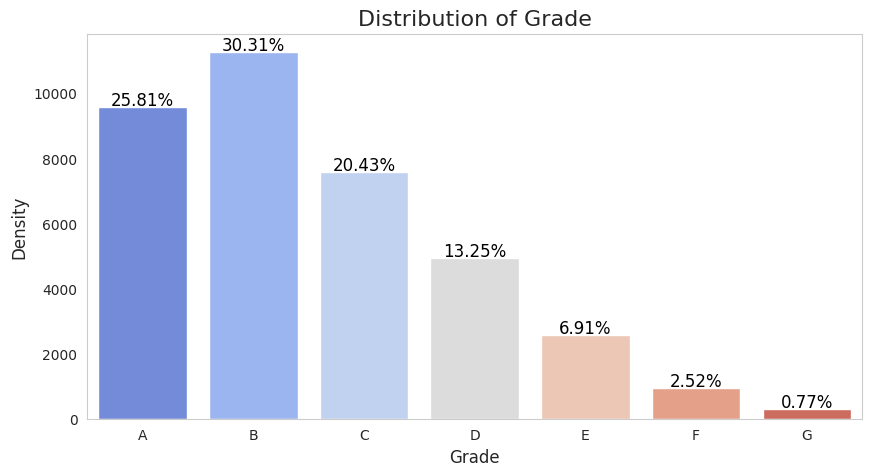

In [55]:
# Create the count plot with a custom color palette
plt.figure(figsize=(10, 5))

# Define a color palette
palette = sns.color_palette("coolwarm", n_colors=len(loan_data.grade.value_counts()))

# Create the count plot
ax = sns.countplot(x=loan_data.grade, palette=palette)

# Add percentage annotations on top of the bars
total_loans = loan_data.grade.count()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_loans) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 50, f'{percentage:.2f}%', ha='center', fontsize=12, color='black')

# Set plot labels and title
ax.set_xlabel('Grade', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution of Grade', fontsize=16)

# Display the plot
plt.show()

**Inference**: A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

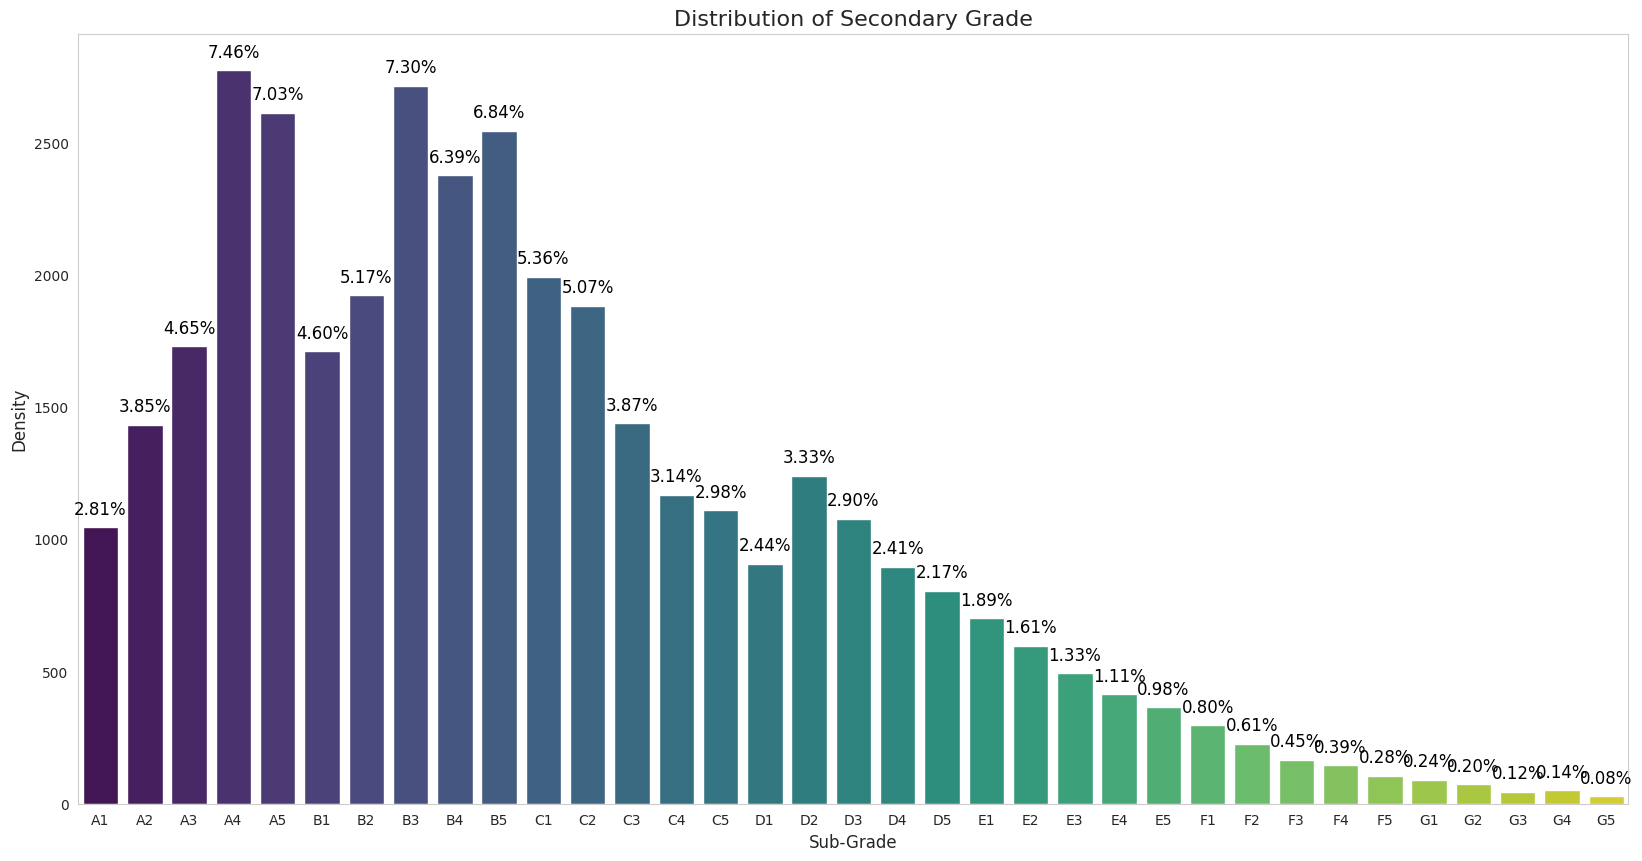

In [58]:
# Distribution of Greade
plt.figure(figsize=(20, 10))

# Define a color palette
palette = sns.color_palette("viridis", n_colors=len(loan_data.sub_grade.value_counts()))

# Create the count plot
ax = sns.countplot(x=loan_data.sub_grade, palette=palette)

# Add percentage annotations on top of the bars
total_loans = loan_data.sub_grade.count()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_loans) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 50, f'{percentage:.2f}%', ha='center', fontsize=12, color='black')

# Set plot labels and title
ax.set_xlabel('Sub-Grade', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution of Secondary Grade', fontsize=16)

# Display the plot
plt.show()

**Inference**: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

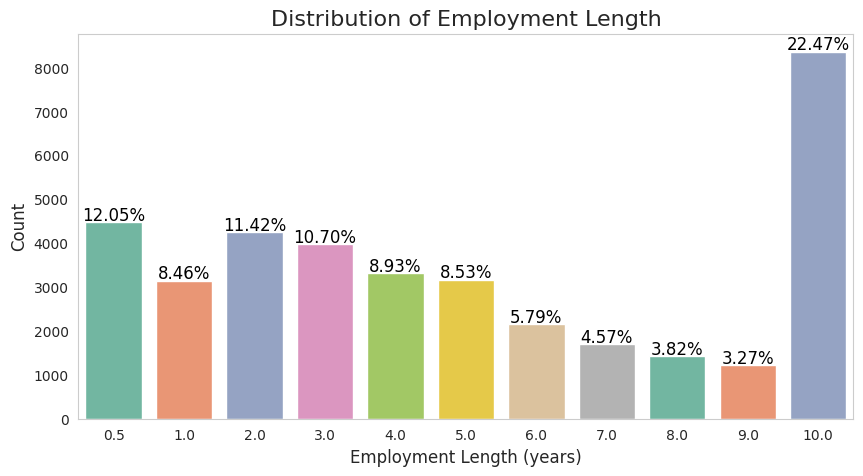

In [60]:
# Create the count plot with a custom color palette
plt.figure(figsize=(10, 5))

# Define a color palette (using the "Set2" palette for distinct colors)
palette = sns.color_palette("Set2", n_colors=len(loan_data.emp_length.value_counts()))

# Create the count plot
ax = sns.countplot(x=loan_data.emp_length, palette=palette)

# Add percentage annotations on top of the bars
total_loans = loan_data.emp_length.count()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_loans) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 50, f'{percentage:.2f}%', ha='center', fontsize=12, color='black')

# Set plot labels and title
ax.set_xlabel('Employment Length (years)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Employment Length', fontsize=16)

# Display the plot
plt.show()


**Inference**: Majority of borrowsers have working experience greater than 10 years.

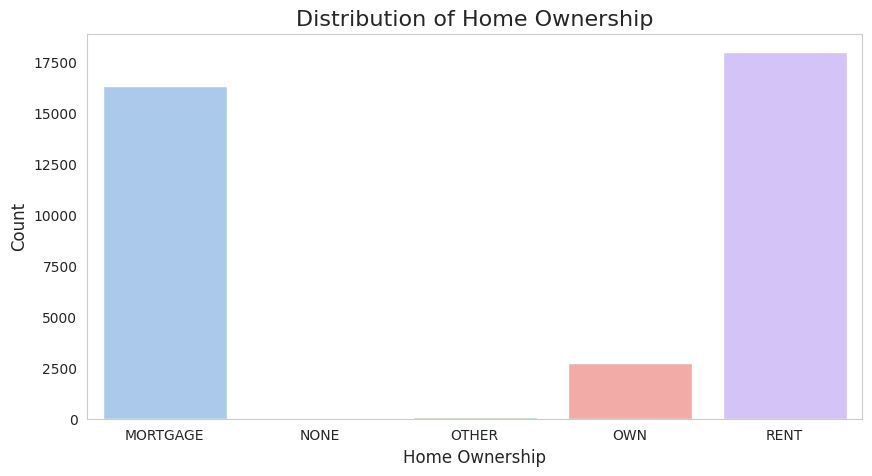

In [61]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))

# Define a color palette (using the "pastel" palette for soft and distinct colors)
palette = sns.color_palette("pastel", n_colors=len(loan_data.home_ownership.value_counts()))

# Create the count plot
ax = sns.countplot(x=loan_data.home_ownership, palette=palette)

# Set plot labels and title
ax.set_xlabel('Home Ownership', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Home Ownership', fontsize=16)

# Display the plot
plt.show()


**Inference**: Majority of borrowsers don't posses property and are on mortage or rent.

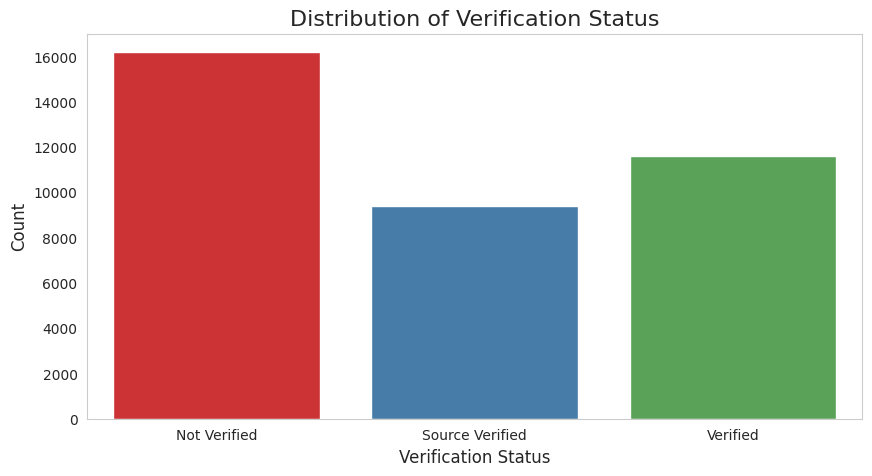

In [63]:
# Distribution of verification_status
# Create the count plot with a custom color palette
plt.figure(figsize=(10, 5))

# Define a color palette (using "Set1" for a distinct color palette)
palette = sns.color_palette("Set1", n_colors=len(loan_data.verification_status.value_counts()))

# Create the count plot
ax = sns.countplot(x=loan_data.verification_status, palette=palette)

# Set plot labels and title
ax.set_xlabel('Verification Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Verification Status', fontsize=16)

# Display the plot
plt.show()

**Inference**: About 50% of the borrowers are verified by the company or have source verified.

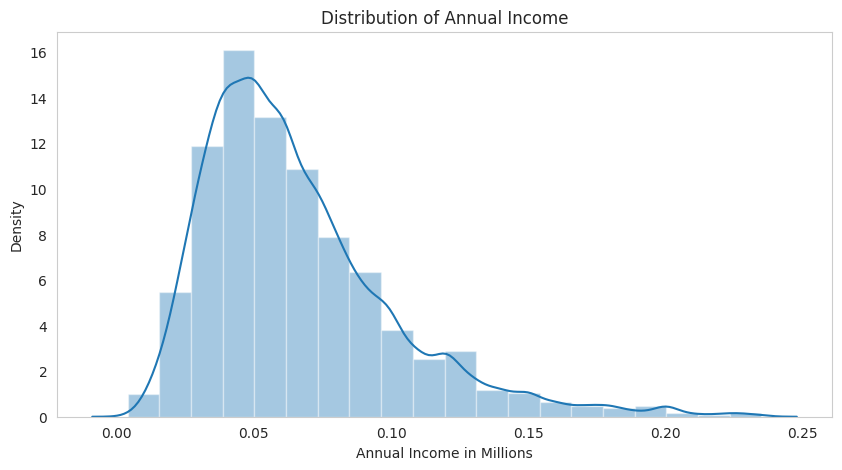

In [64]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_data.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

**Inference**: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

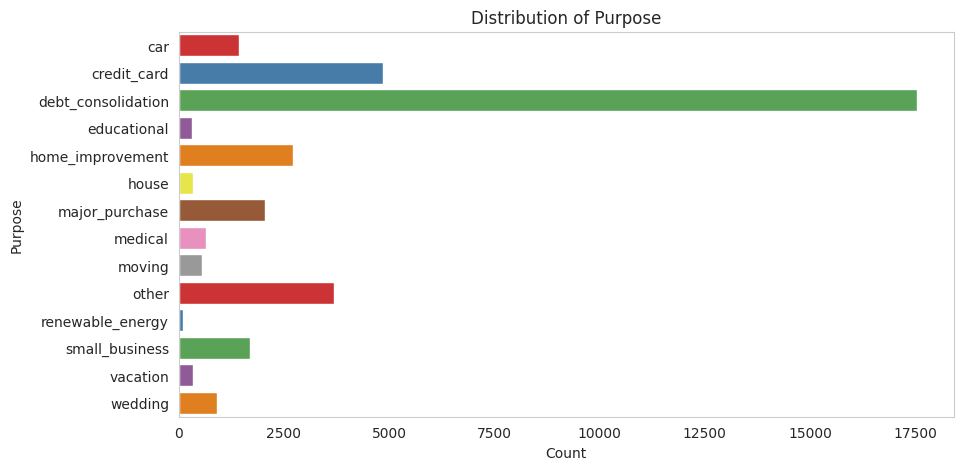

In [70]:
# Distribution of purpose
plt.figure(figsize=(10,5))
palette = sns.color_palette("Set1", n_colors=len(loan_data.purpose.value_counts()))
sns.countplot(y=loan_data.purpose, palette=palette)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

**Inference**: A large percentage of loans are taken for debt consolidation followed by credit card.

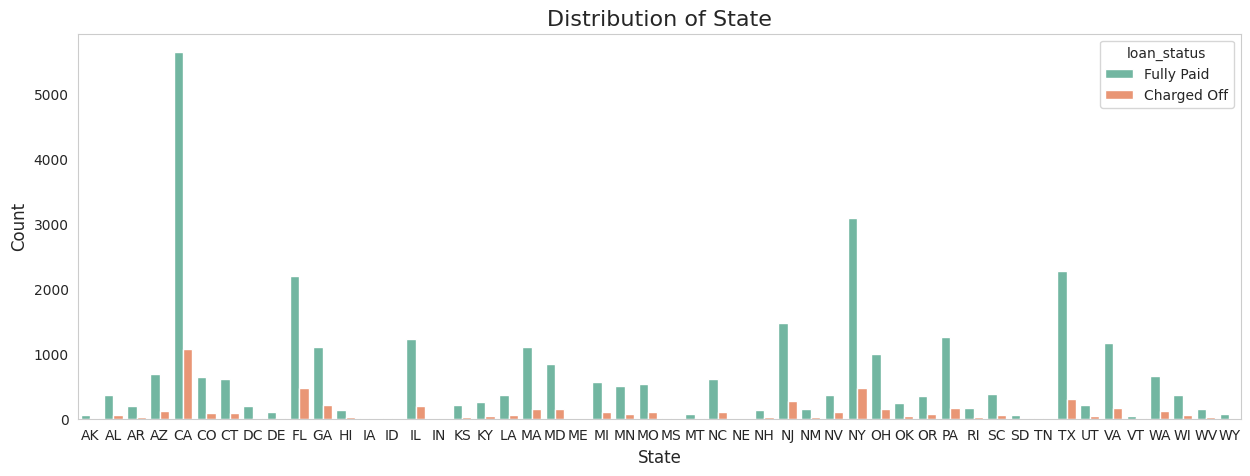

In [71]:
# Distribution of addr_state
plt.figure(figsize=(15, 5))

# Create the count plot with hue
sns.countplot(x=loan_data.addr_state, hue=loan_data.loan_status, palette="Set2")

# Set labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of State', fontsize=16)

# Display the plot
plt.show()

**Inference**: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

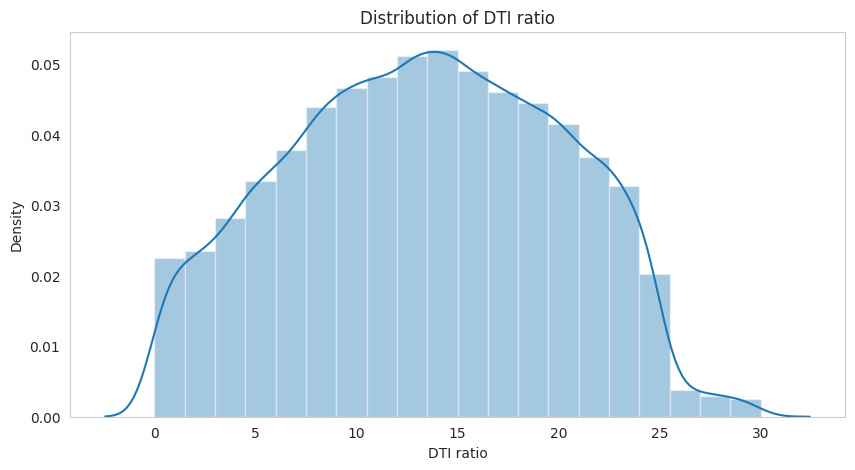

In [72]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

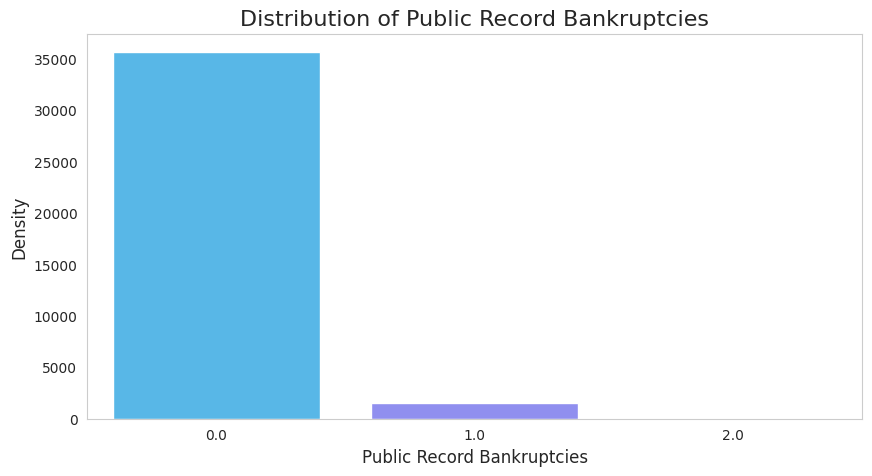

In [77]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10, 5))
# Define a color palette (using 'coolwarm' for a distinct color gradient)
palette = sns.color_palette("cool", n_colors=len(loan_data.pub_rec_bankruptcies.value_counts()))
# Create the count plot with the color palette
ax = sns.countplot(x=loan_data.pub_rec_bankruptcies, palette=palette)
# Set plot labels and title
ax.set_xlabel('Public Record Bankruptcies', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution of Public Record Bankruptcies', fontsize=16)
# Display the plot
plt.show()

**Inference**: Majority of the borrowers have no record of Public Recorded Bankruptcy.

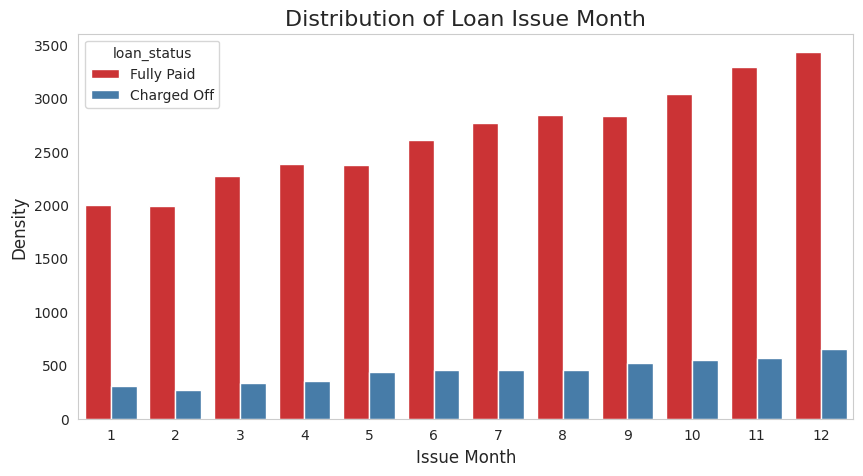

In [79]:
# Distribution of issue_month
# Create the count plot with a custom color palette
plt.figure(figsize=(10, 5))

# Define a color palette for hue based on loan status
palette = sns.color_palette("Set1", n_colors=len(loan_data.loan_status.value_counts()))

# Create the count plot with hue for loan status
ax = sns.countplot(x=loan_data.issue_month, hue=loan_data.loan_status, palette=palette)

# Set plot labels and title
ax.set_xlabel('Issue Month', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution of Loan Issue Month', fontsize=16)

# Display the plot
plt.show()

**Inference**: Majority of the loans are given in last quarter of the year.

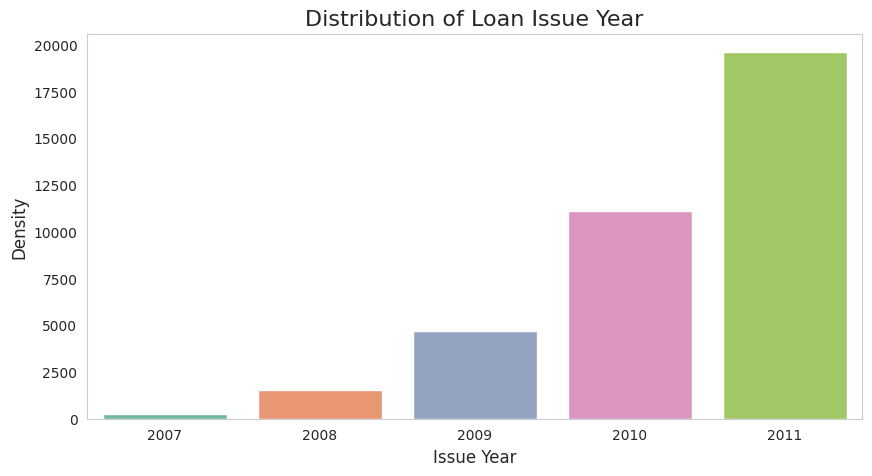

In [80]:
# Distribution of issue_year
# Create the count plot with a custom color palette
plt.figure(figsize=(10, 5))

# Define a color palette (using "Set2" for distinct colors)
palette = sns.color_palette("Set2", n_colors=len(loan_data.issue_year.value_counts()))

# Create the count plot
ax = sns.countplot(x=loan_data.issue_year, palette=palette)

# Set plot labels and title
ax.set_xlabel('Issue Year', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution of Loan Issue Year', fontsize=16)

# Display the plot
plt.show()

**Inference**: The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis

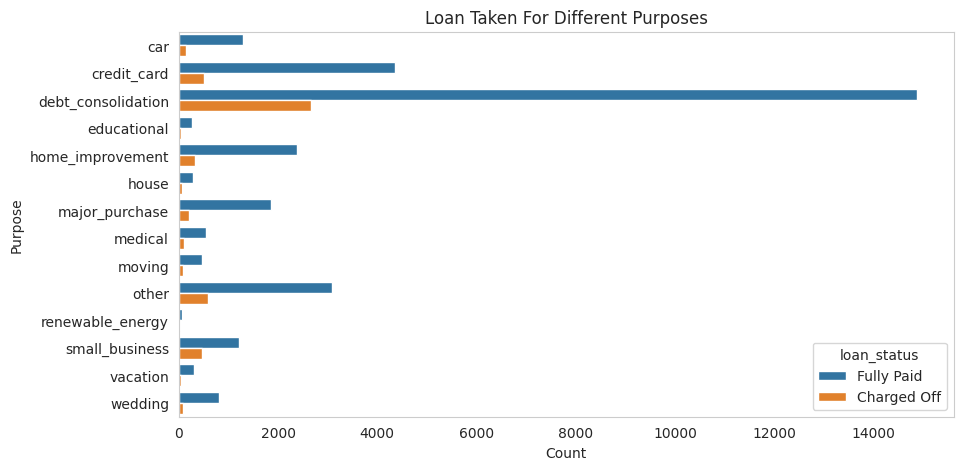

In [83]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

**Inference:** Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

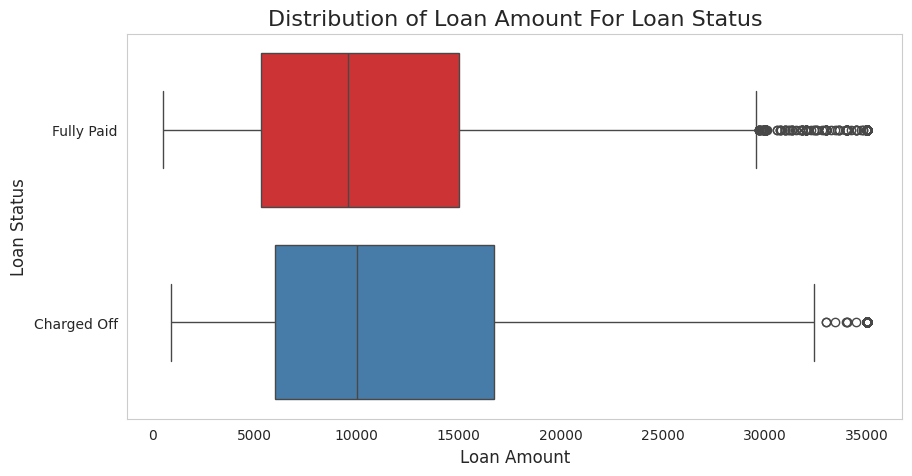

In [84]:
# Distribution of loan_amnt based on loan_status

# Create the boxplot with a custom color palette
plt.figure(figsize=(10, 5))

# Define a color palette for loan status categories
palette = sns.color_palette("Set1", n_colors=len(loan_data.loan_status.unique()))

# Create the boxplot with coloring based on loan status
ax = sns.boxplot(data=loan_data, x='loan_amnt', y='loan_status', palette=palette)

# Set plot labels and title
ax.set_xlabel('Loan Amount', fontsize=12)
ax.set_ylabel('Loan Status', fontsize=12)
ax.set_title('Distribution of Loan Amount For Loan Status', fontsize=16)

# Display the plot
plt.show()

**Inference:** The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

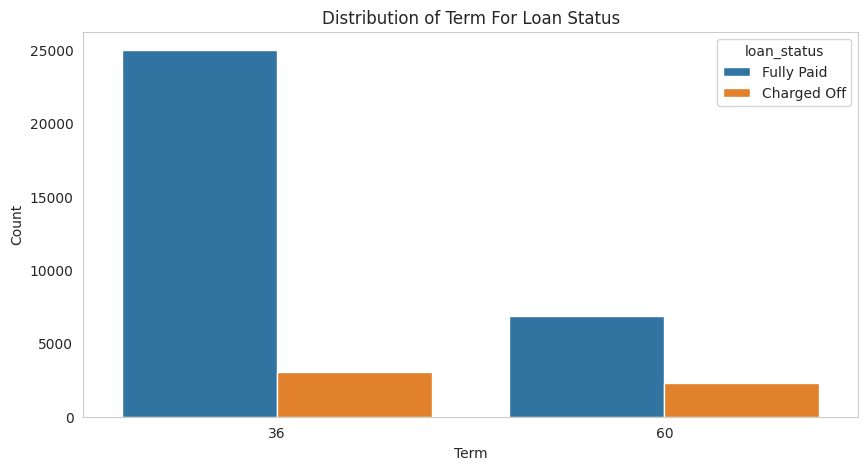

In [85]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

**Inference:** The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

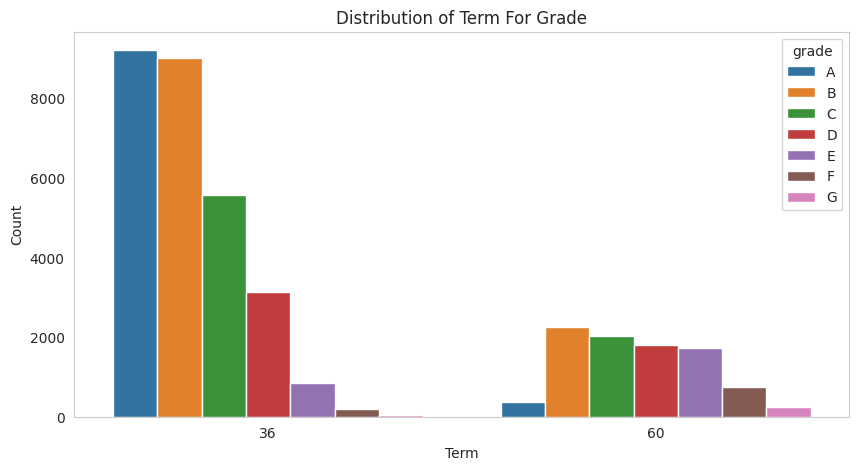

In [86]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

**Inference:** The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

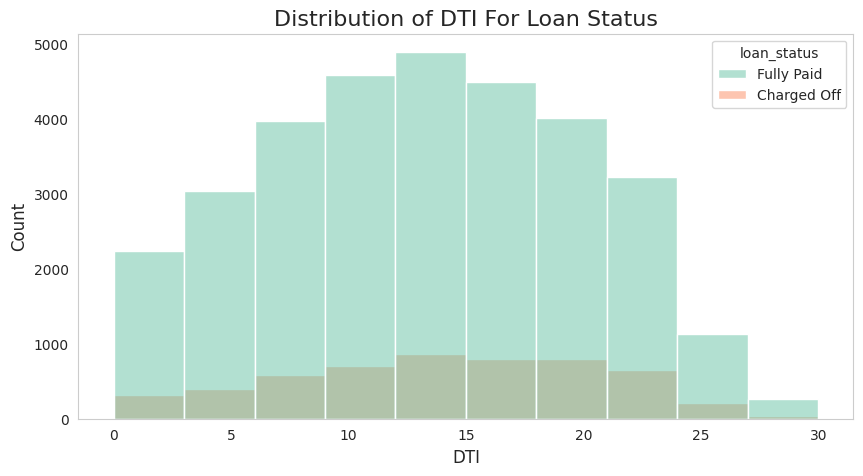

In [88]:
# Distribution of DTI based on Grade

# Create the histogram with a custom color palette
plt.figure(figsize=(10, 5))

# Define a color palette (e.g., using "Set2" for distinct colors)
palette = sns.color_palette("Set2", n_colors=len(loan_data.loan_status.unique()))

# Create the histogram with 'hue' based on loan status and apply the color palette
sns.histplot(data=loan_data, x='dti', hue='loan_status', bins=10, palette=palette)

# Set plot labels and title
plt.xlabel('DTI', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of DTI For Loan Status', fontsize=16)

# Display the plot
plt.show()

**Inference:** The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

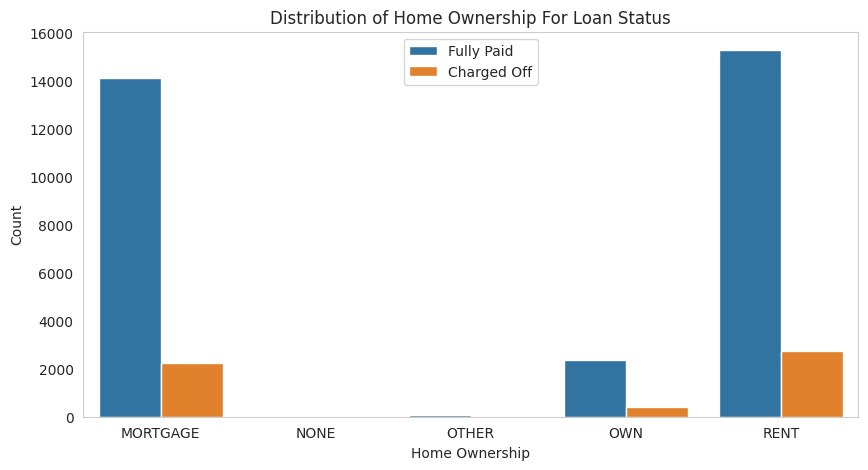

In [89]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

**Inference:** The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

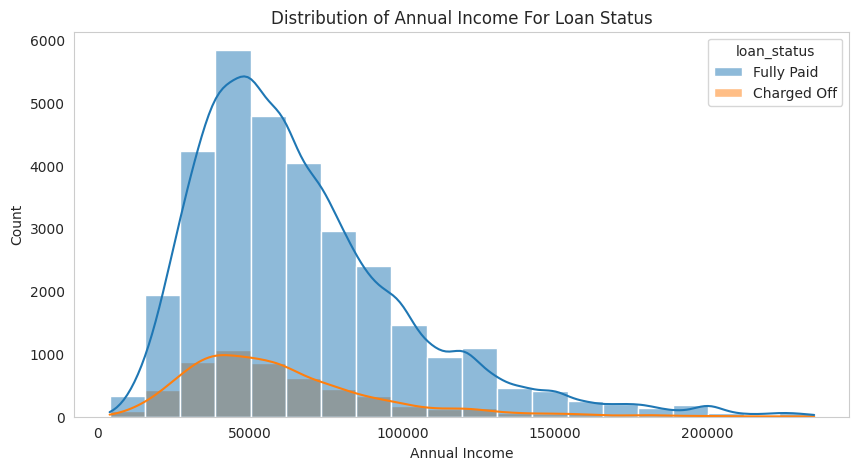

In [90]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

**Inference:** Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

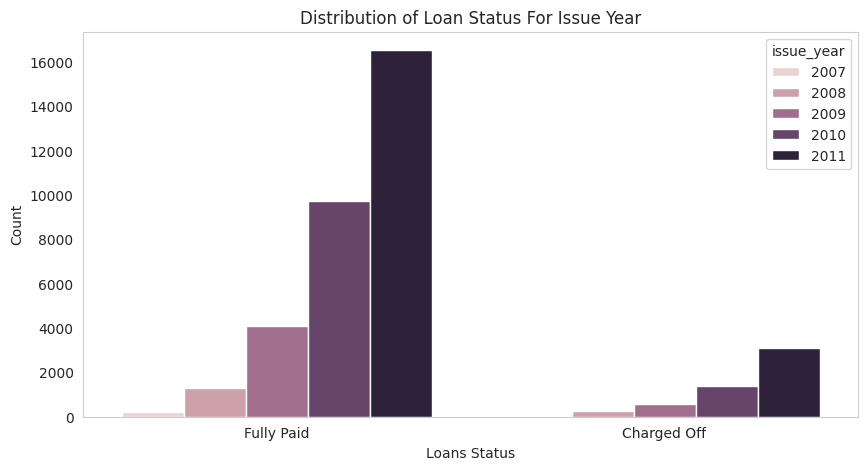

In [91]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

**Inference:** The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

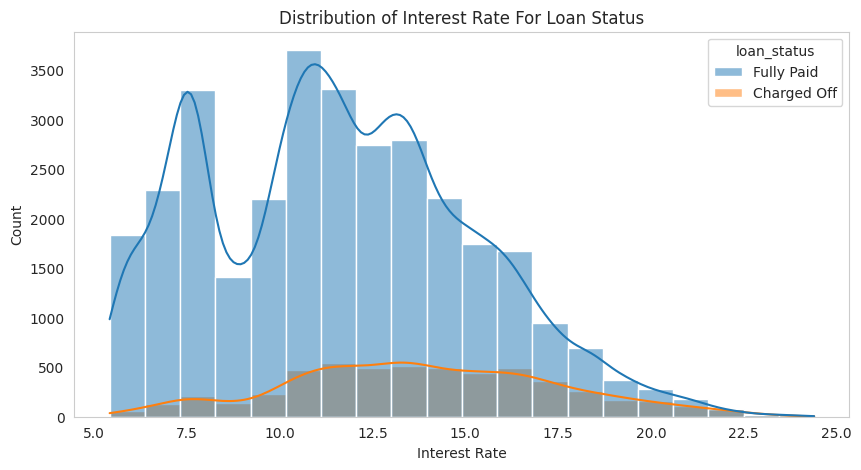

In [92]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

**Inference:** The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

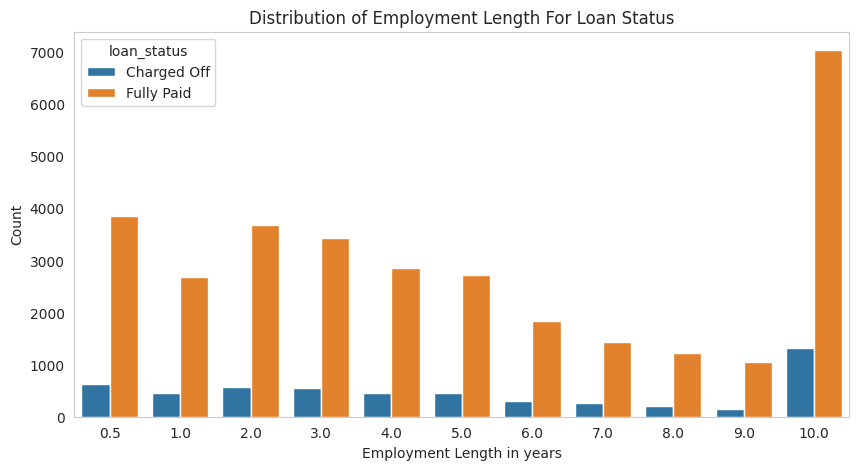

In [93]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

**Inference:** The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis

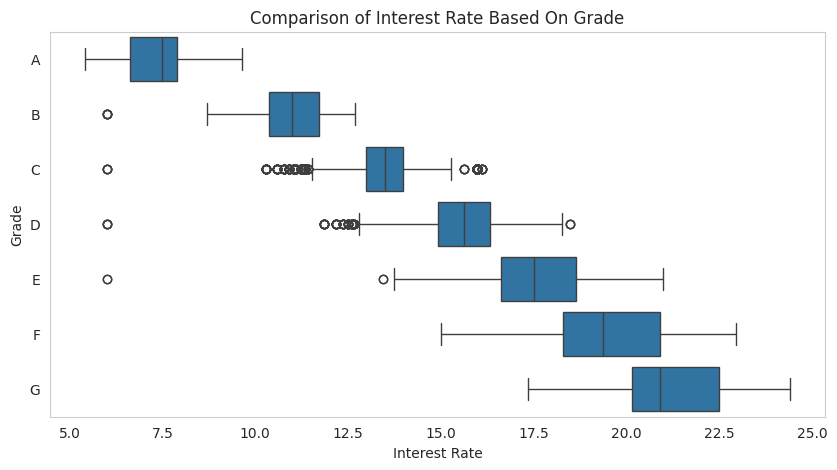

In [94]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

**Inference:** The Grade represent risk factor thus we can say interst rate increases with the risk.

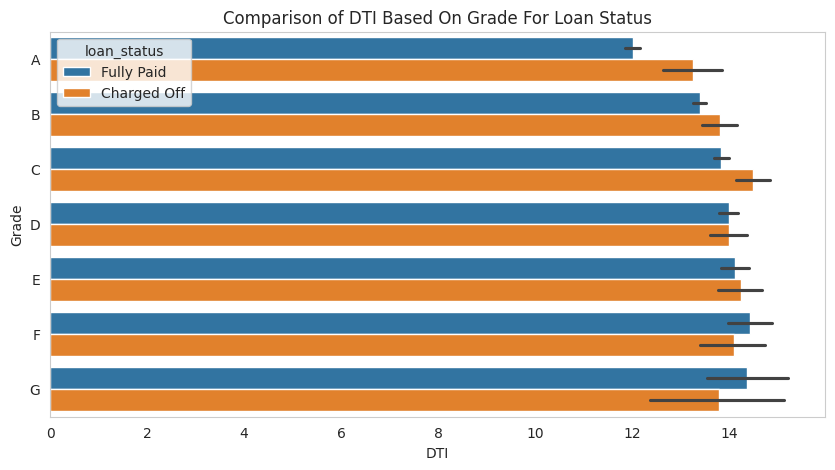

In [95]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

**Inference:** The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

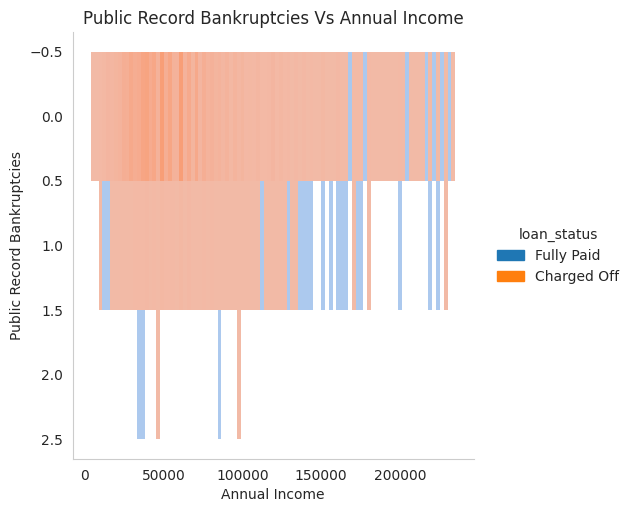

In [96]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

**Inference:** The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

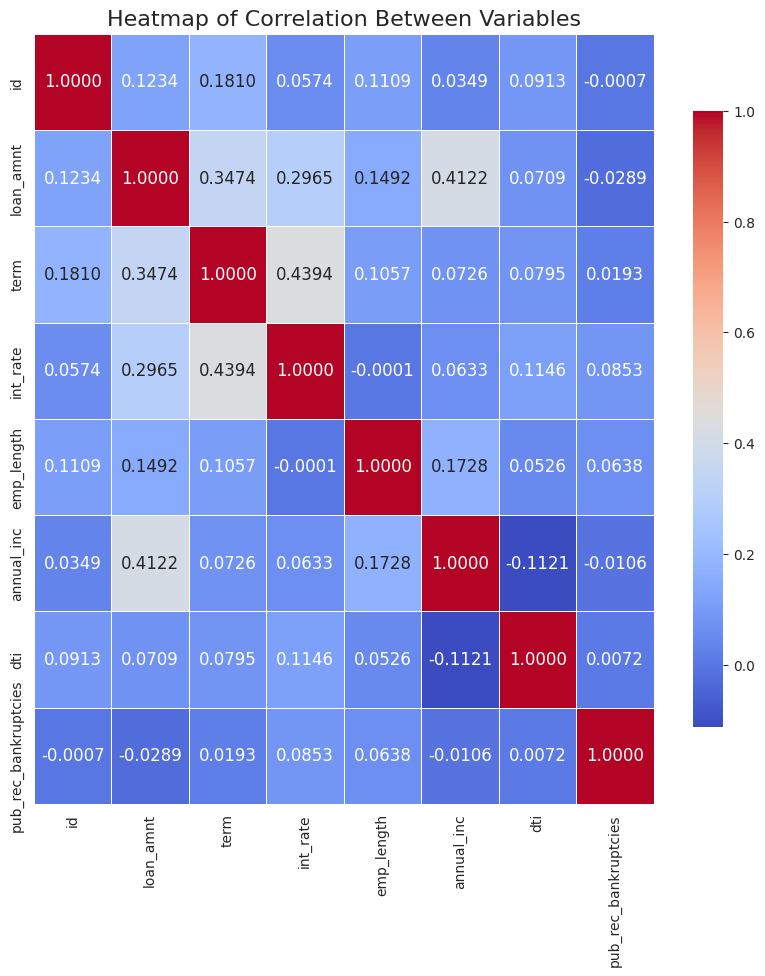

In [102]:
# Heatmap of correlation between variables
numeric_data = loan_data.select_dtypes(include=['float64', 'int64'])

# Create the heatmap with better aesthetics
plt.figure(figsize=(10, 10))

# Create the heatmap with a custom color palette and adjust annotation settings
sns.heatmap(
    numeric_data.corr(),         # Compute the correlation matrix for numeric data
    annot=True,                  # Annotate each cell with the numeric value
    cmap='coolwarm',             # Color palette for the heatmap
    fmt='.4f',                   # Formatting the numbers in the annotations
    annot_kws={"size": 12},      # Font size for the annotations
    linewidths=0.5,              # Line width between cells
    cbar_kws={'shrink': 0.8}     # Adjust color bar size
)

# Display the plot
plt.title('Heatmap of Correlation Between Variables', fontsize=16)
plt.show()

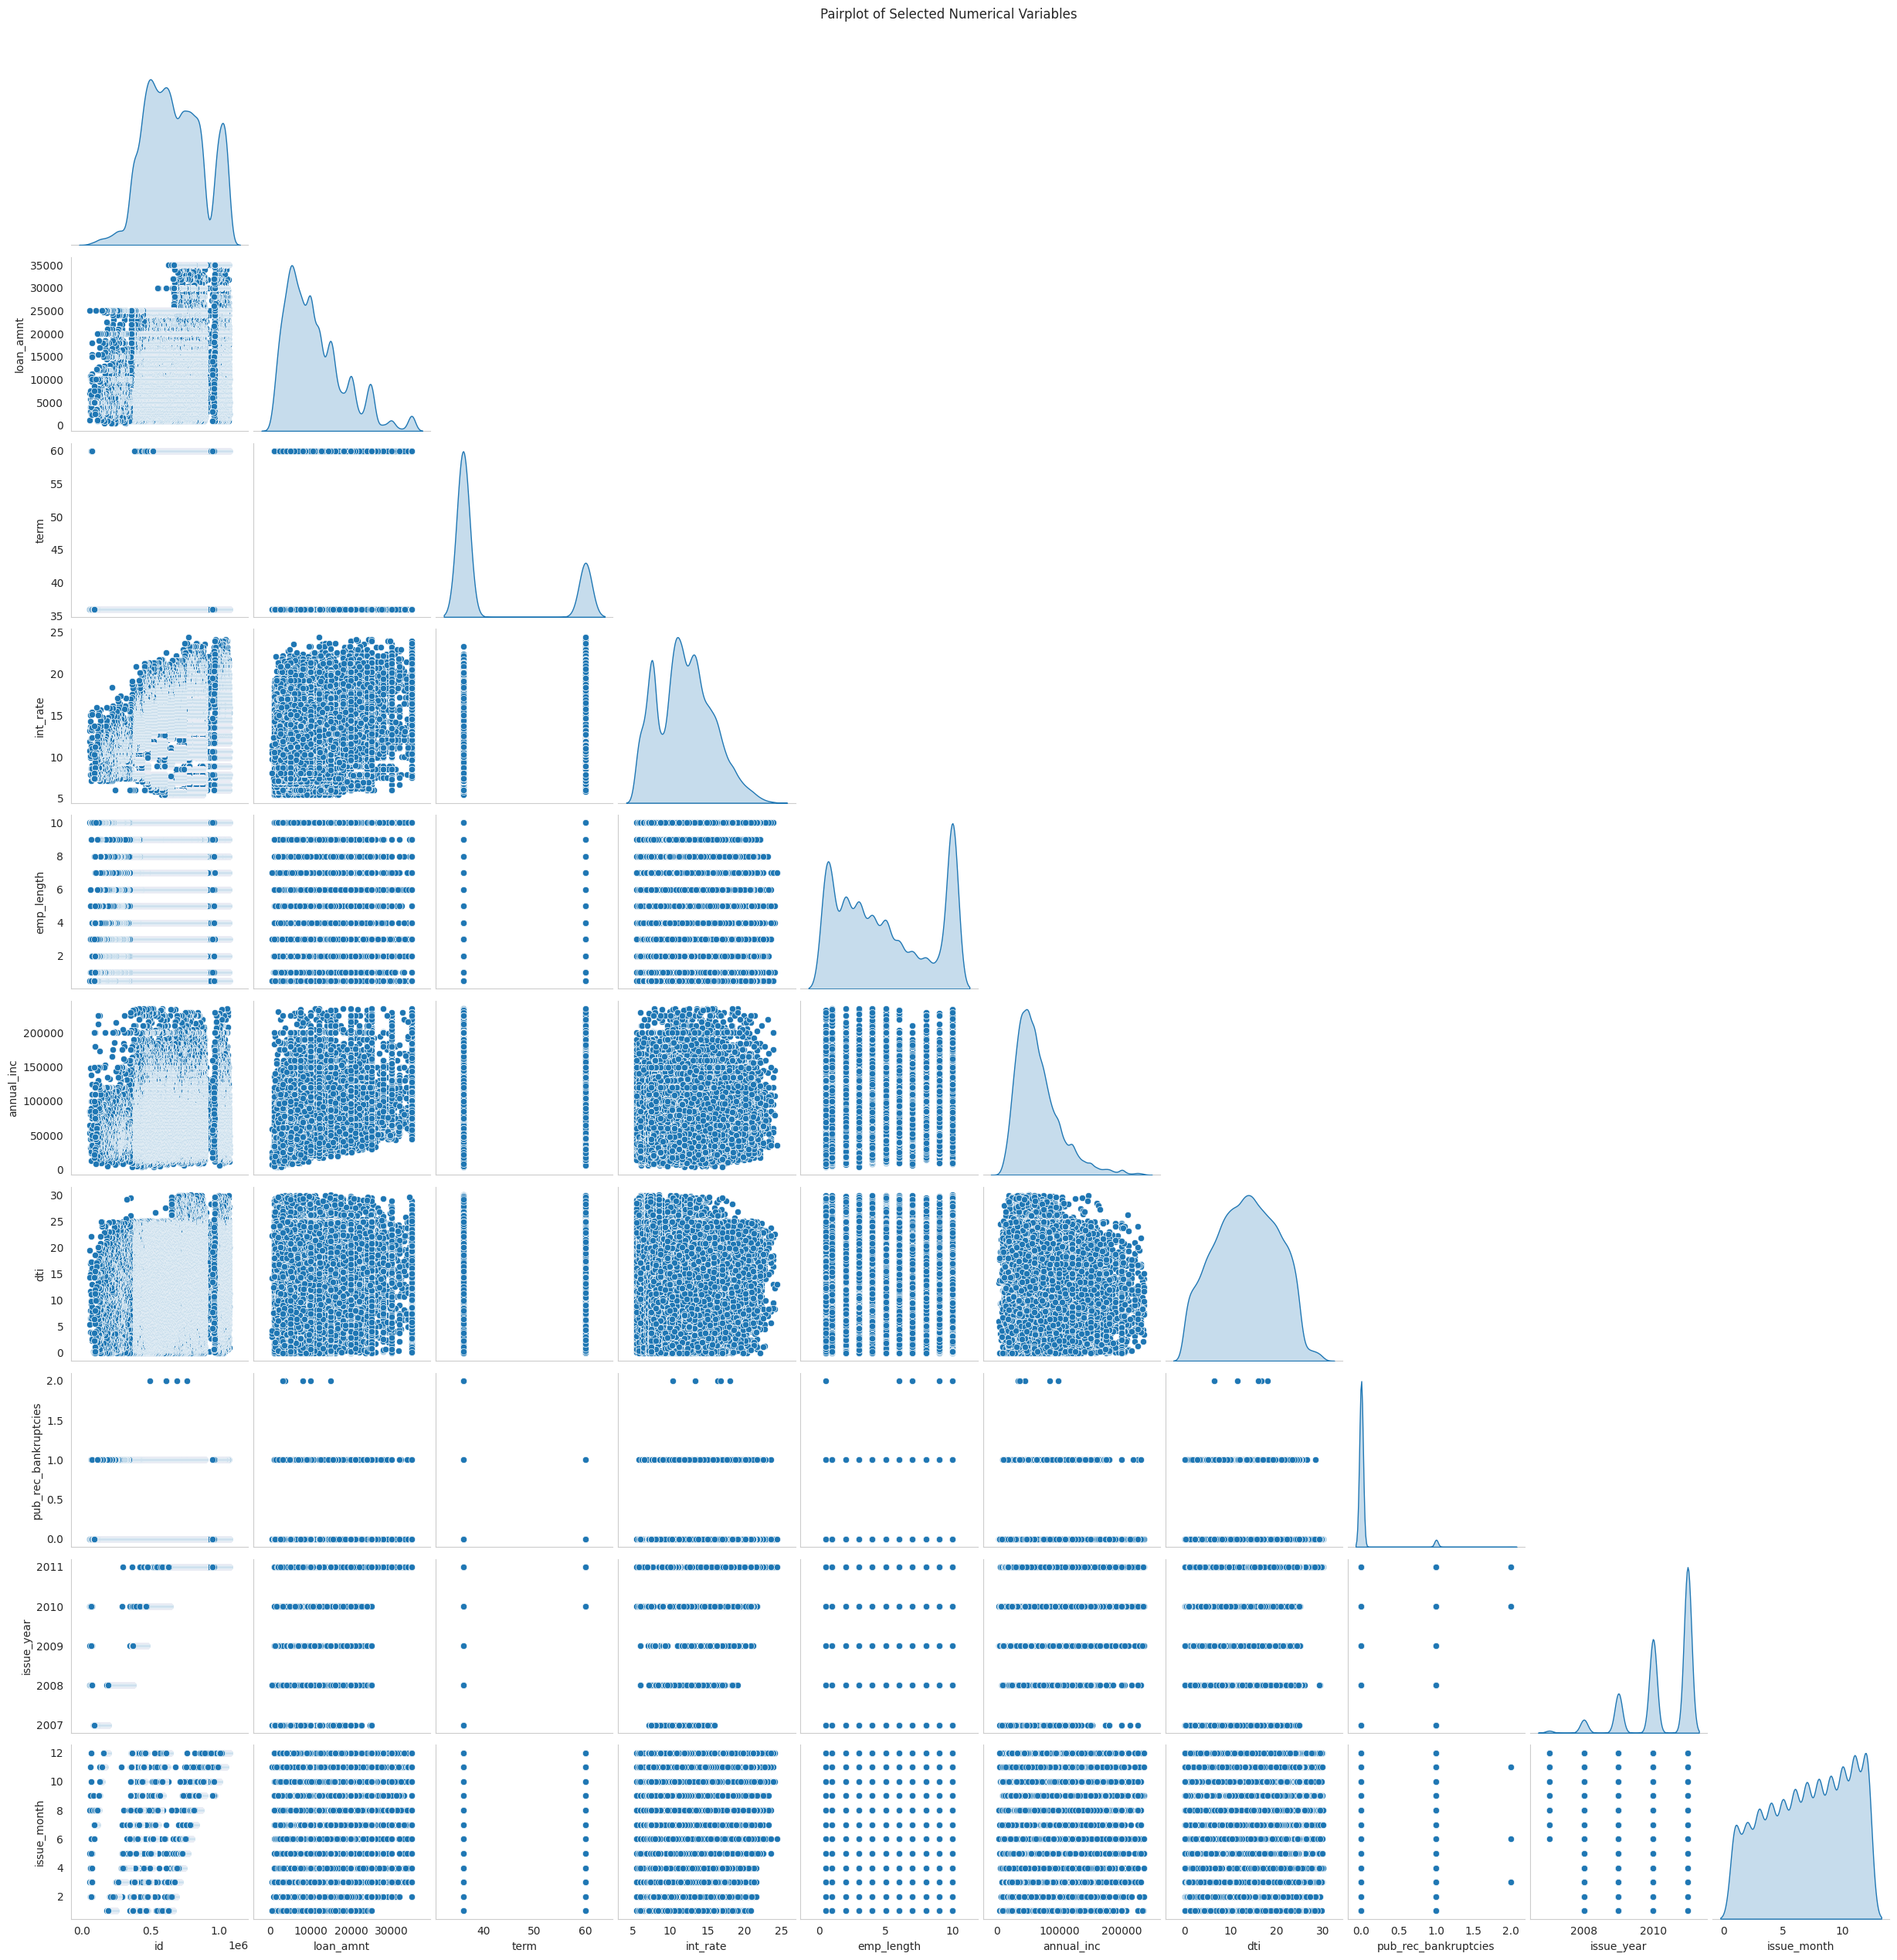

In [111]:
# Strip spaces from column names (if any)
sns.pairplot(loan_data[['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'annual_inc', 'loan_status', 'purpose', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month']], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Selected Numerical Variables", y=1.02)
plt.show()

In [116]:
# Check versions of the all used libraries
import matplotlib as matpltl
import plotly as pltly

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matpltl.__version__)
print("Plotly version:", pltly.__version__)

Pandas version: 2.2.2
Numpy version: 1.26.4
Seaborn version: 0.13.2
Matplotlib version: 3.8.0
Plotly version: 5.24.1


## Insights
### Univariate Analysis
 - The number of defaulted loan is 7 times less than the number of fully paid loan.
 - The majority of loan has a term of 36 months compared to 60 months.
 - The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 - A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
 - Majority of borrowsers have working experience greater than 10 years.
 - Majority of borrowsers don't posses property and are on mortage or rent.
 - About 50% of the borrowers are verified by the company or have source verified.
 - Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
 - A large percentage of loans are taken for debt consolidation followed by credit card.
 - Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
 - Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Majority of the borrowers have no record of Public Recorded Bankruptcy.
 - Majority of the loans are given in last quarter of the year.
 - The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis
 - Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
 - The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
 - The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
 - The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
 - The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
 - The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
 - Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
 - The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
 - The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis
 - The Grade represent risk factor thus we can say interst rate increases with the risk.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

Recommendations
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
    1. DTI
    2. Grades
    3. Verification Status
    4. Annual income
    5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
    1. Burrowers not from large urban cities like california, new york, texas, florida etc.
    2. Burrowers having annual income in the range 50000-100000.
    3. Burrowers having Public Recorded Bankruptcy.
    4. Burrowers with least grades like E,F,G which indicates high risk.
    5. Burrowers with very high Debt to Income value.
    6. Burrowers with working experience 10+ years.